# Predicción de popularidad de canciones en Spotify

# Importación de librerias

In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lectura del DataSet

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/valemicolgarcia/Data-Science/main/Entrega%20Final/Spotify_Youtube.csv")

In [4]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


ELIMINACIÓN DE UNA VARIABLE --> no aporta ningun tipo de información (Unnamed: 0)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Objetivo Analítico y Contexto

### Definición de objetivo

Se tiene la intención de entrenar un algoritmo para detectar cuáles son los factores que influyen en el número de likes que tiene el video de una canción en youtube. El objetivo es predecir este número basándose en diferentes características. Se utilizará un dataset que contiene 28 variables asociadas a Spotify, Youtube y propiedades propias de la composición musical de la canción.

### Contexto

Se tiene un dataset con estadísticas del top 10 de canciones de varios artistas en Spotify y su respectivo video en Youtube. La idea es poder determinar que características se deben tener en cuenta para incrementar la popularidad de las canciones. Este modelo puede ser utilizado por productoras o compositores a la hora de analizar sus próximos lanzamientos

# Información del dataset

- Estadísticas de musica de youtube incluyendo el numero de streams
- Número de visualizaciones del video official de la cancion en youtube

### ABC - Análisis del dataset

TAMAÑO DEL DATASET

In [5]:
df.shape

(20718, 28)

METADATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [7]:
df.describe() #no incluye las columnas string

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


VARIABLES DEL DATASET

In [8]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

### Distinción entre variables categóricas o numéricas

Para distinguirlas se analiza la información que anteriormente aportó el método df.info ()

VARIABLES CATEGÓRICAS --> object
- Artist: Nombre del artista
- Url_spotify: Url del artista
- Track: Nombre de la canción, como esta contenida en Spotify
- Album: Album que contiene la canción
- Album_type: Tipo de album, solista o compilado
- Uri: Link de Spotify para encontrar la canción en la API
- Url_youtube: Url del video de la cancion en Youtube
- Title: Titulo del video en Youtube
- Channel: Nombre del canal que publicó el video
- official_video: Variable booleana que indica si el video es oficial
- Description: Descripción del video en Youtube
- Licensed: Indica si el video tiene licencia


VARIABLES NUMÉRICAS --> float64 
- Danceability: Describe que tan adecuada es la cancion para ser bailada
- Energy: Representa una medida de la intensidad y actividad
- Key: La clave en la que se encuentra la pista
- Loudness: El volumen general de la pista en decibeles (dB)
- Speechiness: Detecta la presencia de palabras habladas en la pista
- Acousticness: Una medida de confianza para saber si la pista es acustica
- Instrumentalness: Indica si una pista no contiene voces
- Liveness: Detecta la presencia de una audiencia en la grabación
- Valence: Describe la positividad musical que transmite una pista
- Tempo: El tempo general estimado en pulsaciones por minuto (BPM)
- Duration_ms: Duración de la canción en milisegundos
- Views: Visualizaciones en Youtube
- Likes: Likes en Youtube
- Comments: Comentarios en Youtube
- Stream: Número de reproducciones de la canción en Spotify

In [10]:
numericas = df.select_dtypes(include=['int', 'float'])
numericas.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'],
      dtype='object')

In [11]:
numericas.shape #vemos que hay 15 variables numericas

(20718, 15)

In [12]:
categoricas = df.select_dtypes(include=['object'])
categoricas.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed',
       'official_video'],
      dtype='object')

In [13]:
categoricas.shape #vemos que hay 12 variables categoricas

(20718, 12)

# EDA - Análisis Exploratorio de datos

### Hay alguna relación entre la duración de la cancion y la cantidad de likes?

- Gráfico de puntos o de dispersión con MatPlotLib

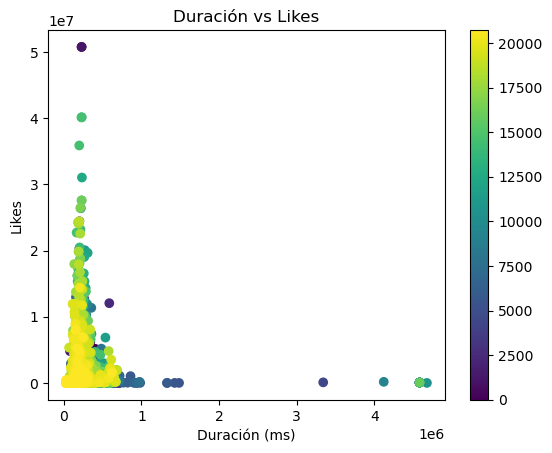

In [16]:
fig, ax = plt.subplots()
mapeo_colores = ax.scatter(df['Duration_ms'], df['Likes'], c=df.index) 
fig.colorbar(mapeo_colores)
ax.set_title('Duración vs Likes')
ax.set_xlabel('Duración (ms)')
ax.set_ylabel('Likes')
ax.grid(False)
plt.show()

Se observa que la duración y la cantidad de likes no tienen una relacion lineal positiva, sino que se identifican puntos que se distribuyen al azar sin un patrón obvio (falta de dependencia entre los valores)

### Hay relación entre likes, comentarios y visualizaciones?

- Gráfico de puntos o de dispersión con SeaBorn

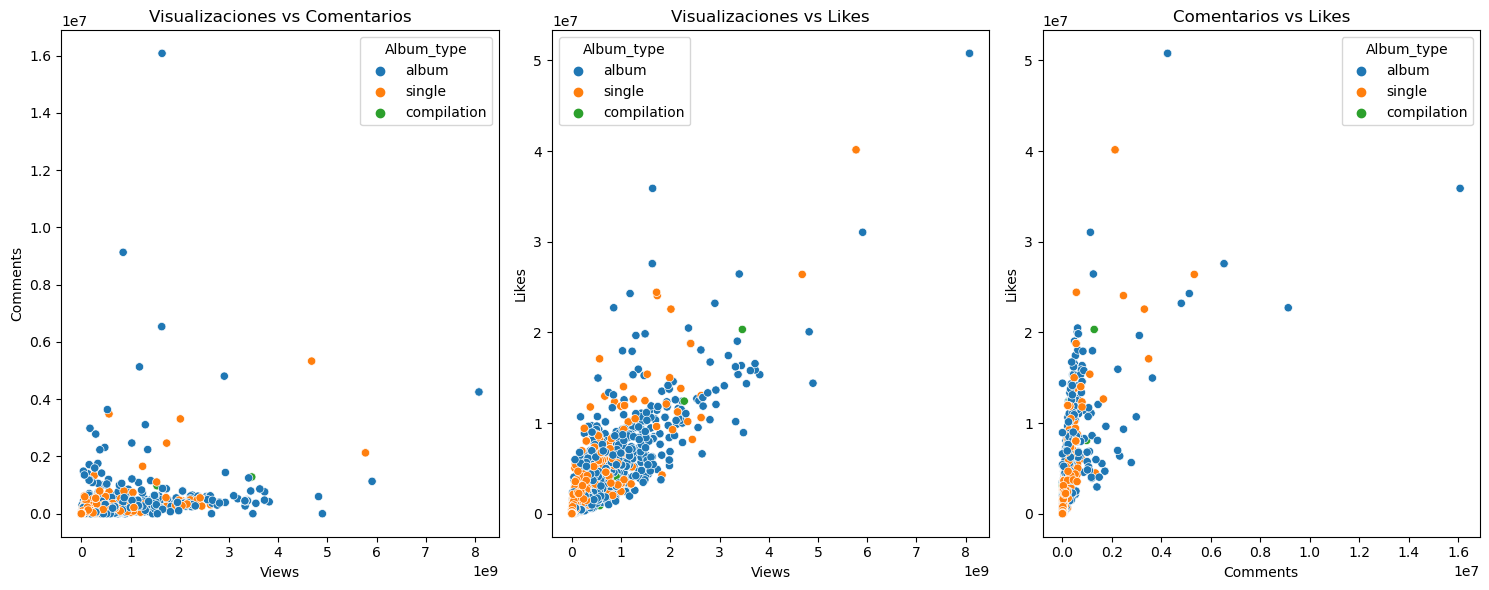

In [17]:
f, axs = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw=dict(width_ratios=[3, 3, 3])) # seteo el lienzo

sns.scatterplot(data=df, x='Views', y='Comments', hue='Album_type', ax=axs[0])
axs[0].set_title('Visualizaciones vs Comentarios')
sns.scatterplot(data=df, x='Views', y='Likes', hue='Album_type', ax=axs[1])
axs[1].set_title('Visualizaciones vs Likes')
sns.scatterplot(data=df, x='Comments', y='Likes', hue='Album_type', ax=axs[2])
axs[2].set_title('Comentarios vs Likes')
f.tight_layout()

plt.show()

Se observa que estas variables están intimamente relacionadas, al haber mas visualizaciones hay mas likes y comentarios, el segundo gráfico es el que se observa con mayor claridad

- GRÁFICO QUE INCLUYE A LAS TRES VARIABLES A RELACIONAR: LIKES, COMENTARIOS Y VISUALIZACIONES

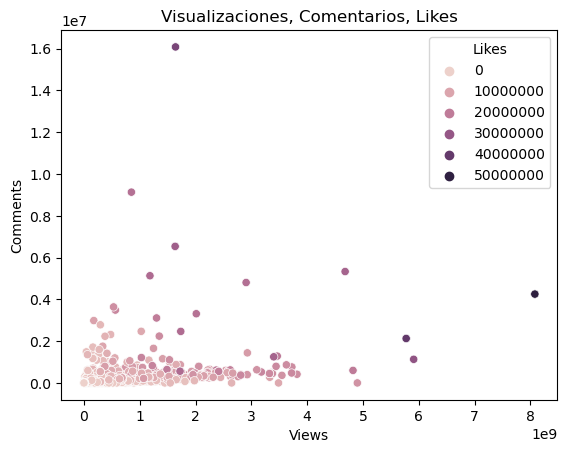

In [15]:
ax = sns.scatterplot(data=df, x='Views', y='Comments', hue='Likes')
ax.grid(False)
ax.set_title('Visualizaciones, Comentarios, Likes')
plt.show()

Se puede ver que al subir las visualizaciones, aumentan los comentarios y a su vez la cantidad de likes se ve que gradualmente empieza a subir

### Influye la licencia en la cantidad de likes?

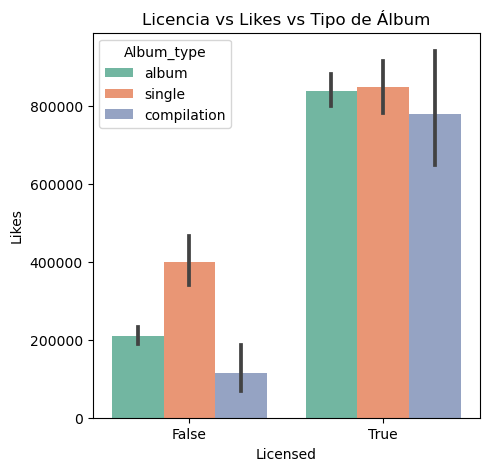

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(y='Likes', x= 'Licensed', hue='Album_type', data=df, palette='Set2')
plt.title('Licencia vs Likes vs Tipo de Álbum')
plt.show()

Se observa que las canciones que presentan un video que tiene licencia, tienen muchos más likes.  Además, este grafico da información sobre cómo se relacionan esos datos con el tipo de album, en ambos casos, las canciones solistas son las que tienen más likes

# Análisis de normalidad de las variables numéricas


### Análisis

- Se analiza en el describe, en cada variable si la media es igual a la mediana, y se acompaña con graficos de las distribuciones

DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

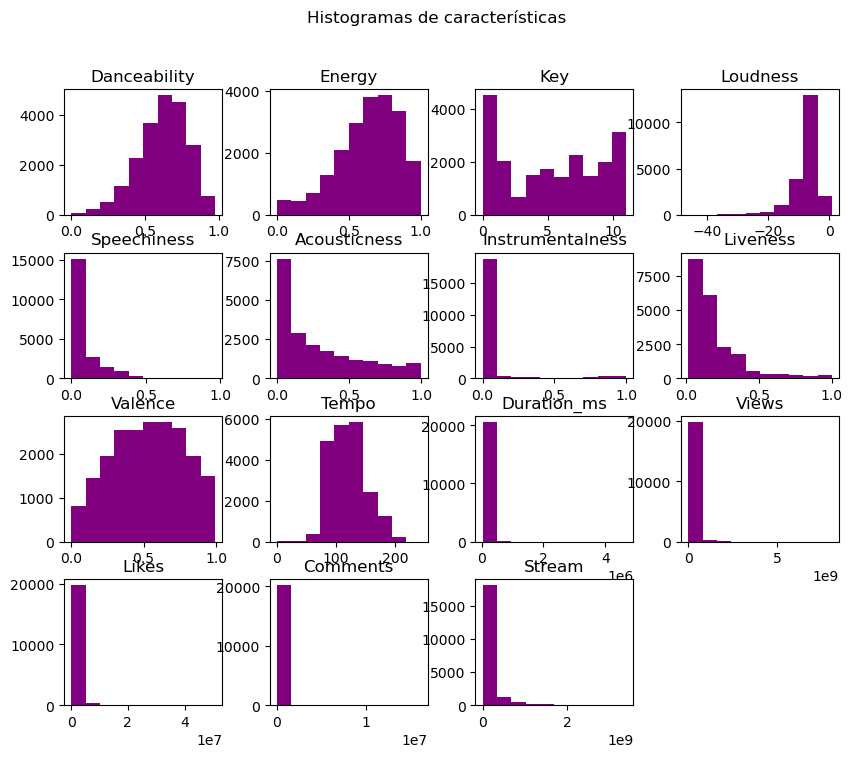

In [21]:
df.hist(figsize=(10, 8), grid=False, color='purple')
plt.suptitle("Histogramas de características ")
plt.show()

Se analiza simetría y si las distribuciones siguen la campana de gauss en cada caso

### Determinación de variables normales

Si la media y la mediana son muy parecidas quiere decir que la columna es normal o tiende a eso

- Danceability: mean= 0.61, 50%= 0.63, columna NORMAL
- Energy : mean= 0.63 , 50%= 0.66 , columna NORMAL

- Key: mean= 5.30 , 50%= 5.0 , en el grafico vemos que no sigue la campana de gaus, NO NORMAL
- Loudness: mean= -7.67 , 50%= -6.53, columna NO NORMAL, en el grafico vemos que esta sesgada
- Speechiness: mean= 0.09 , 50%= 0.05, columna NO NORMAL, en el grafico vemos que la distribucion esta sesgada a izquierda
- Acousticness : mean= 0.29, 50%= 0.19, columna NO NORMAL, en el grafico vemos que la distribucion esta sesgada a izquierda
- Instrumentalness: mean= 0.05, 50%= 0.00, columna NO NORMAL, lo vemos claramente en el grafico
- Liveness: mean= 0.19, 50%= 0.12, columna NO NORMAL, vemos que esta sesgada a izqueirda

- Valence: mean= 0.52, 50%= 0.53, columna NORMAL
- Tempo: mean= 120.63, 50%= 119.96, columna NORMAL

- Duration_ms: mean= 2.24, 50%= 2.13, columna NO NORMAL
- Views: mean=9.3 , 50%=1.4 , columna NO NORMAL
- Likes: mean= 6.63, 50%= 1.24, columna NO NORMAL
- Comments: mean= 2.75, 50%= 3.27, columna NO NORMAL
- Stream: mean= 1.35, 50%= 4.96, columna NO NORMAL

División en dos dataframes que luego van a servir para tratar outliers y nulos

In [19]:
columnas_normales = ['Danceability', 'Energy', 'Valence', 'Tempo']
variables_normales = numericas [columnas_normales]
variables_normales.columns

Index(['Danceability', 'Energy', 'Valence', 'Tempo'], dtype='object')

In [20]:
variables_NOnormales = numericas.drop (columns= columnas_normales)
variables_NOnormales.columns

Index(['Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream'],
      dtype='object')

# Visualización y tratamiento de datos nulos

Al observar la informacion que nos ofrece df.info() se puede visualizar que hay datos faltantes en algunas columnas

### Instalación de librerias de utilidad

In [21]:
!pip install missingno

In [22]:
import missingno as msno

### Visualización de datos Nan y análisis

SUMA DE NULOS

In [23]:
df.isnull().sum() #para cada columna, indico cuantos datos nulos Nan tiene

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

CANTIDAD DE NULOS POR COLUMNA

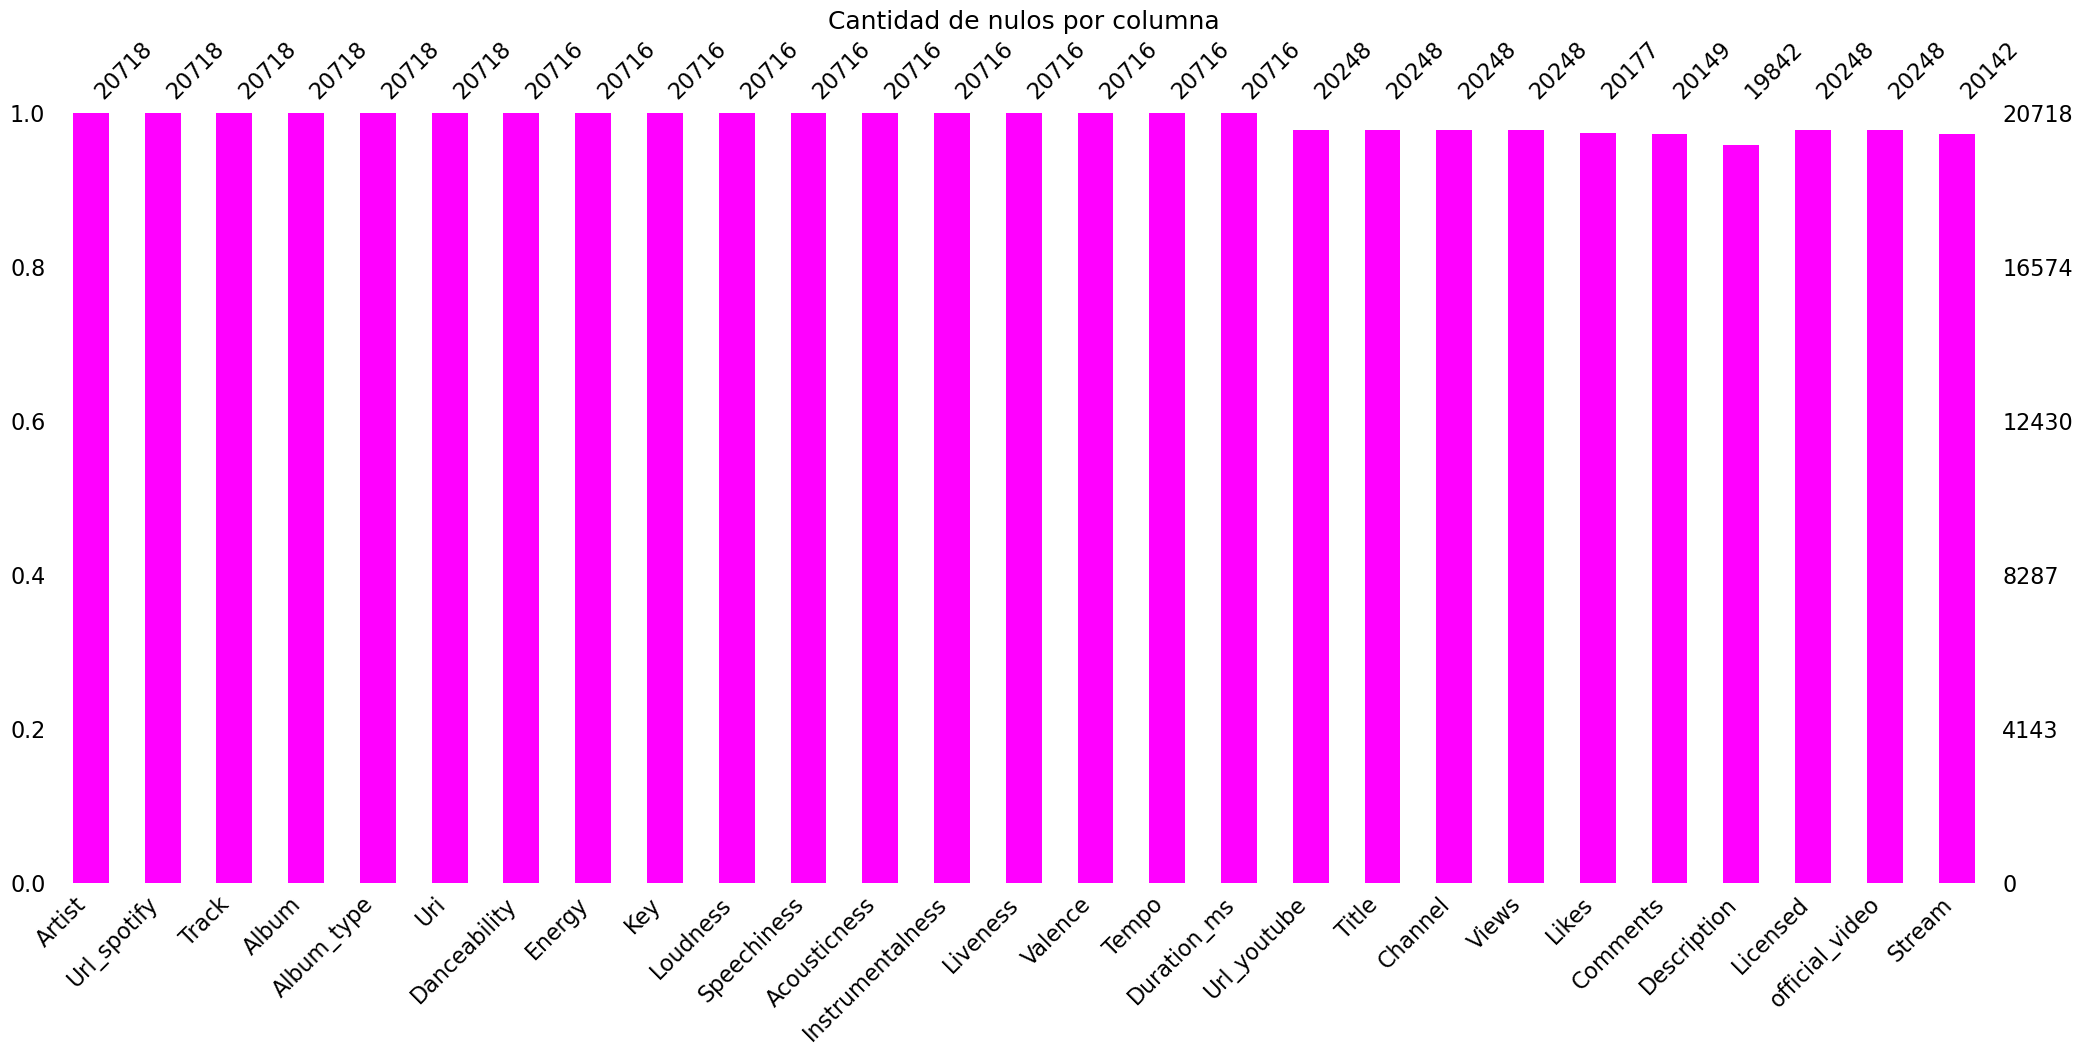

In [24]:
msno.bar (df, color='magenta')
plt.title ('Cantidad de nulos por columna', fontsize=18)
plt.show()

#Se observa la cantidad de datos que hay que rellenar y se toma la decision de de todavía no eliminar ninguna columna

CANTIDAD DE NULOS EN VARIABLES NORMALES

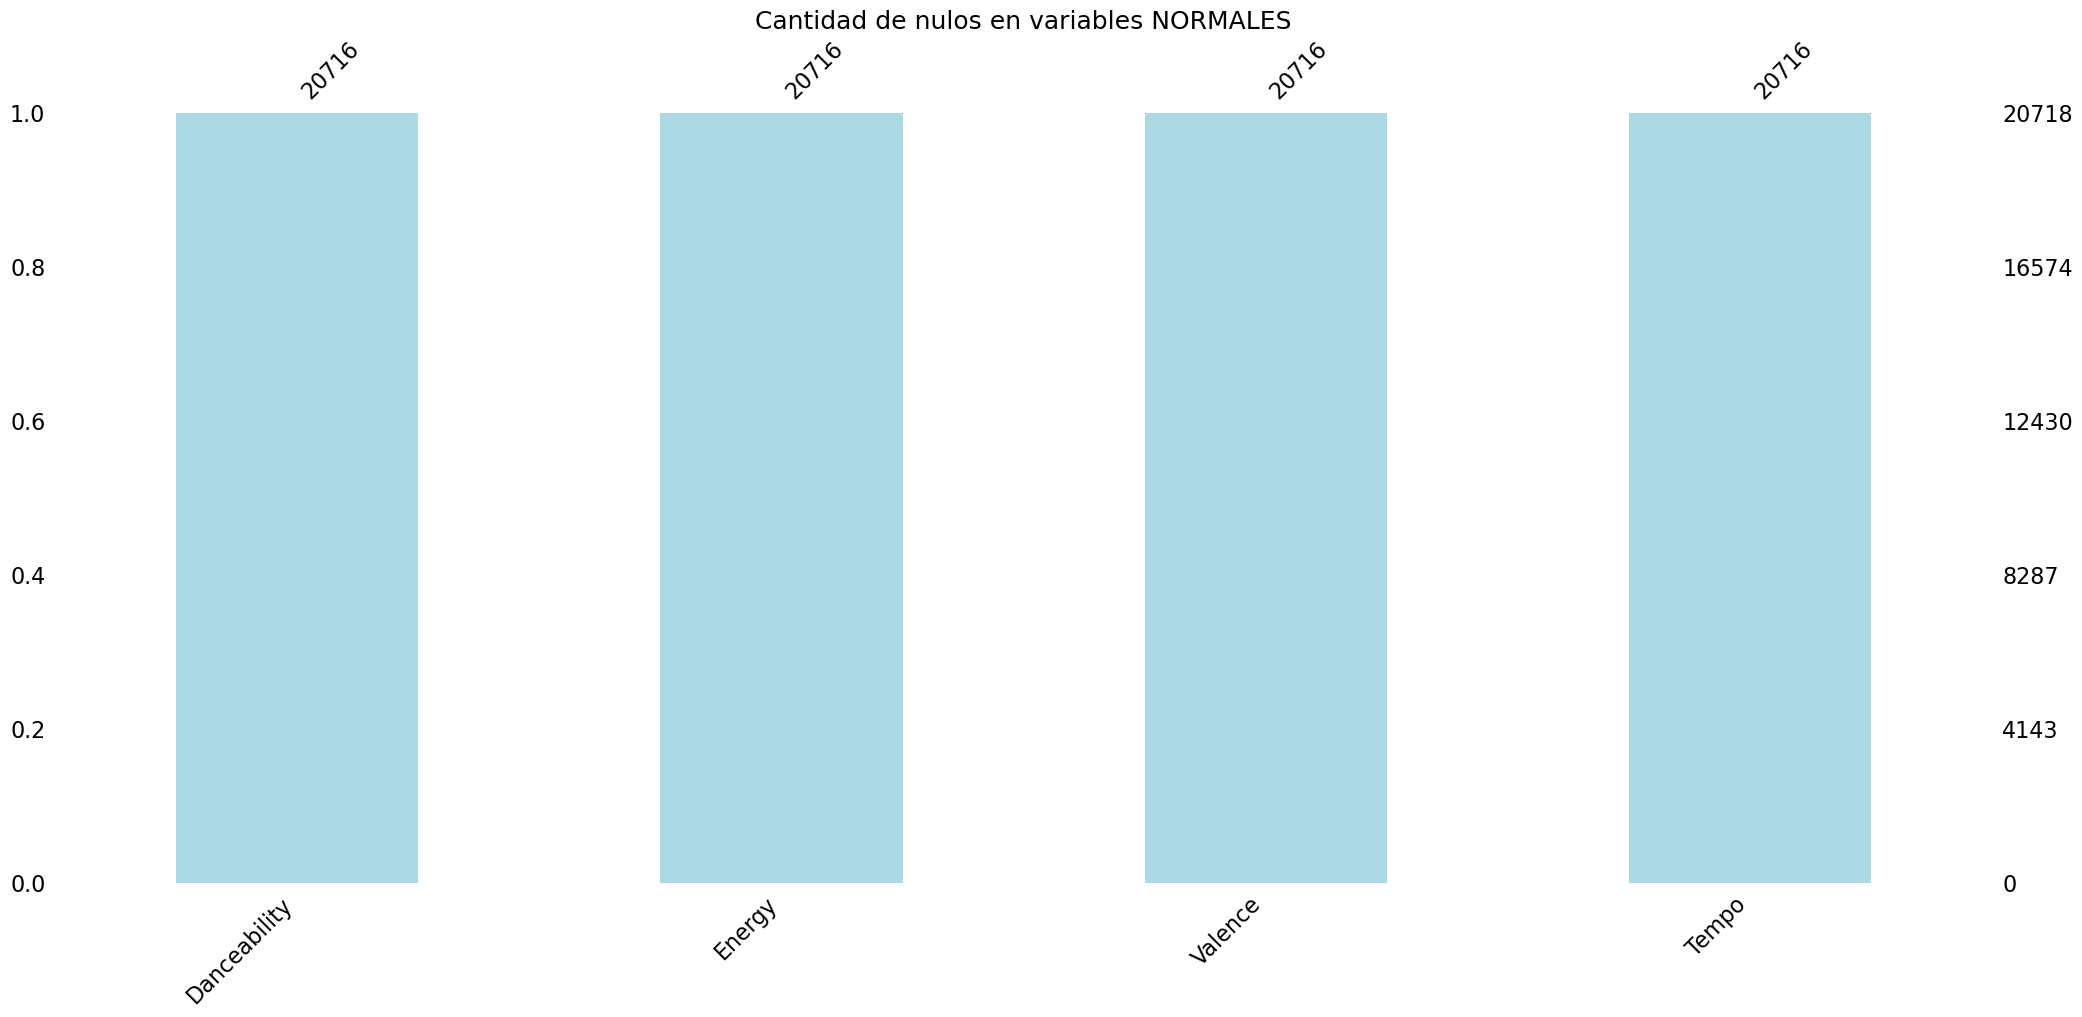

In [26]:
msno.bar (variables_normales, color='lightblue') #se observa que faltan dos datos en cada columna
plt.title ('Cantidad de nulos en variables NORMALES', fontsize=18)
plt.show()

CANTIDAD DE NULOS EN VARIABLES NO NORMALES

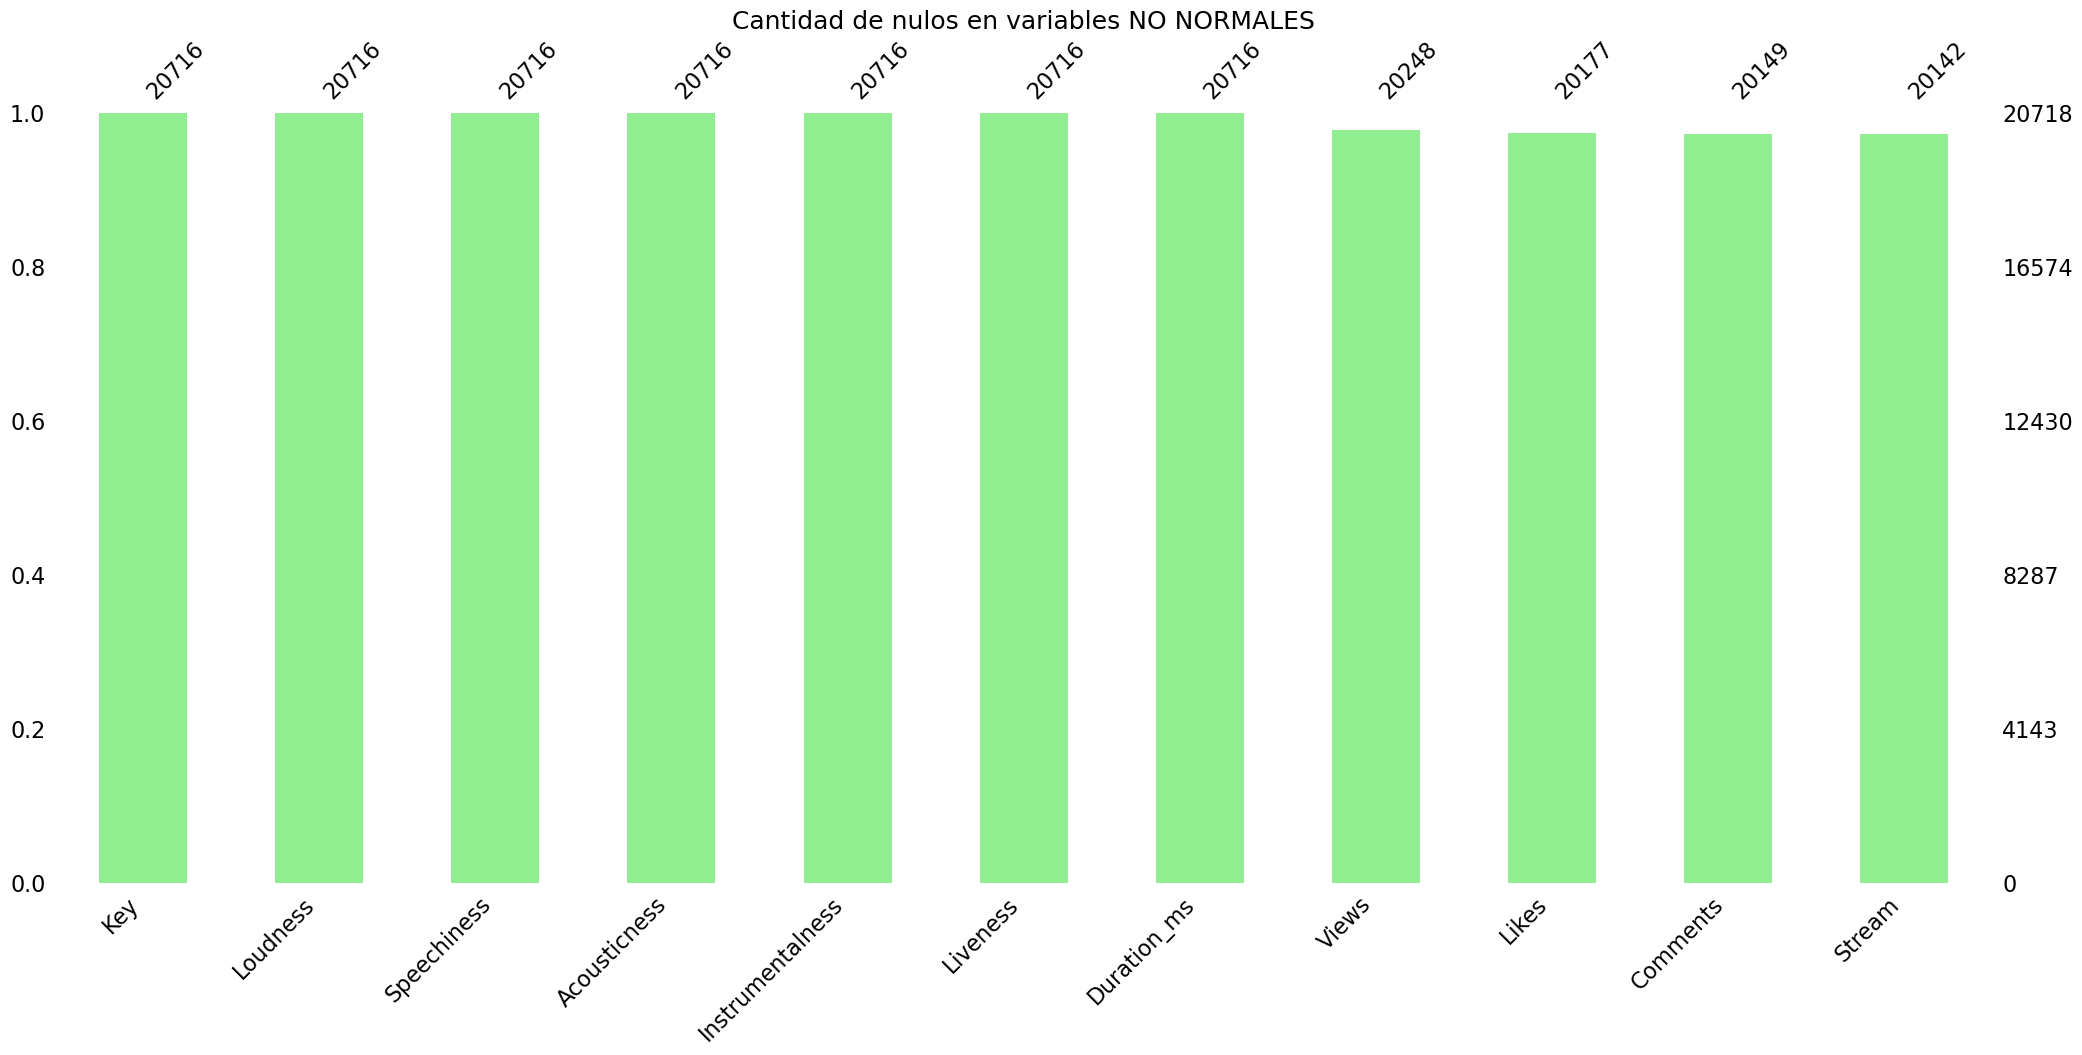

In [29]:
msno.bar (variables_NOnormales, color='lightgreen')
plt.title ('Cantidad de nulos en variables NO NORMALES', fontsize=18)
plt.show()

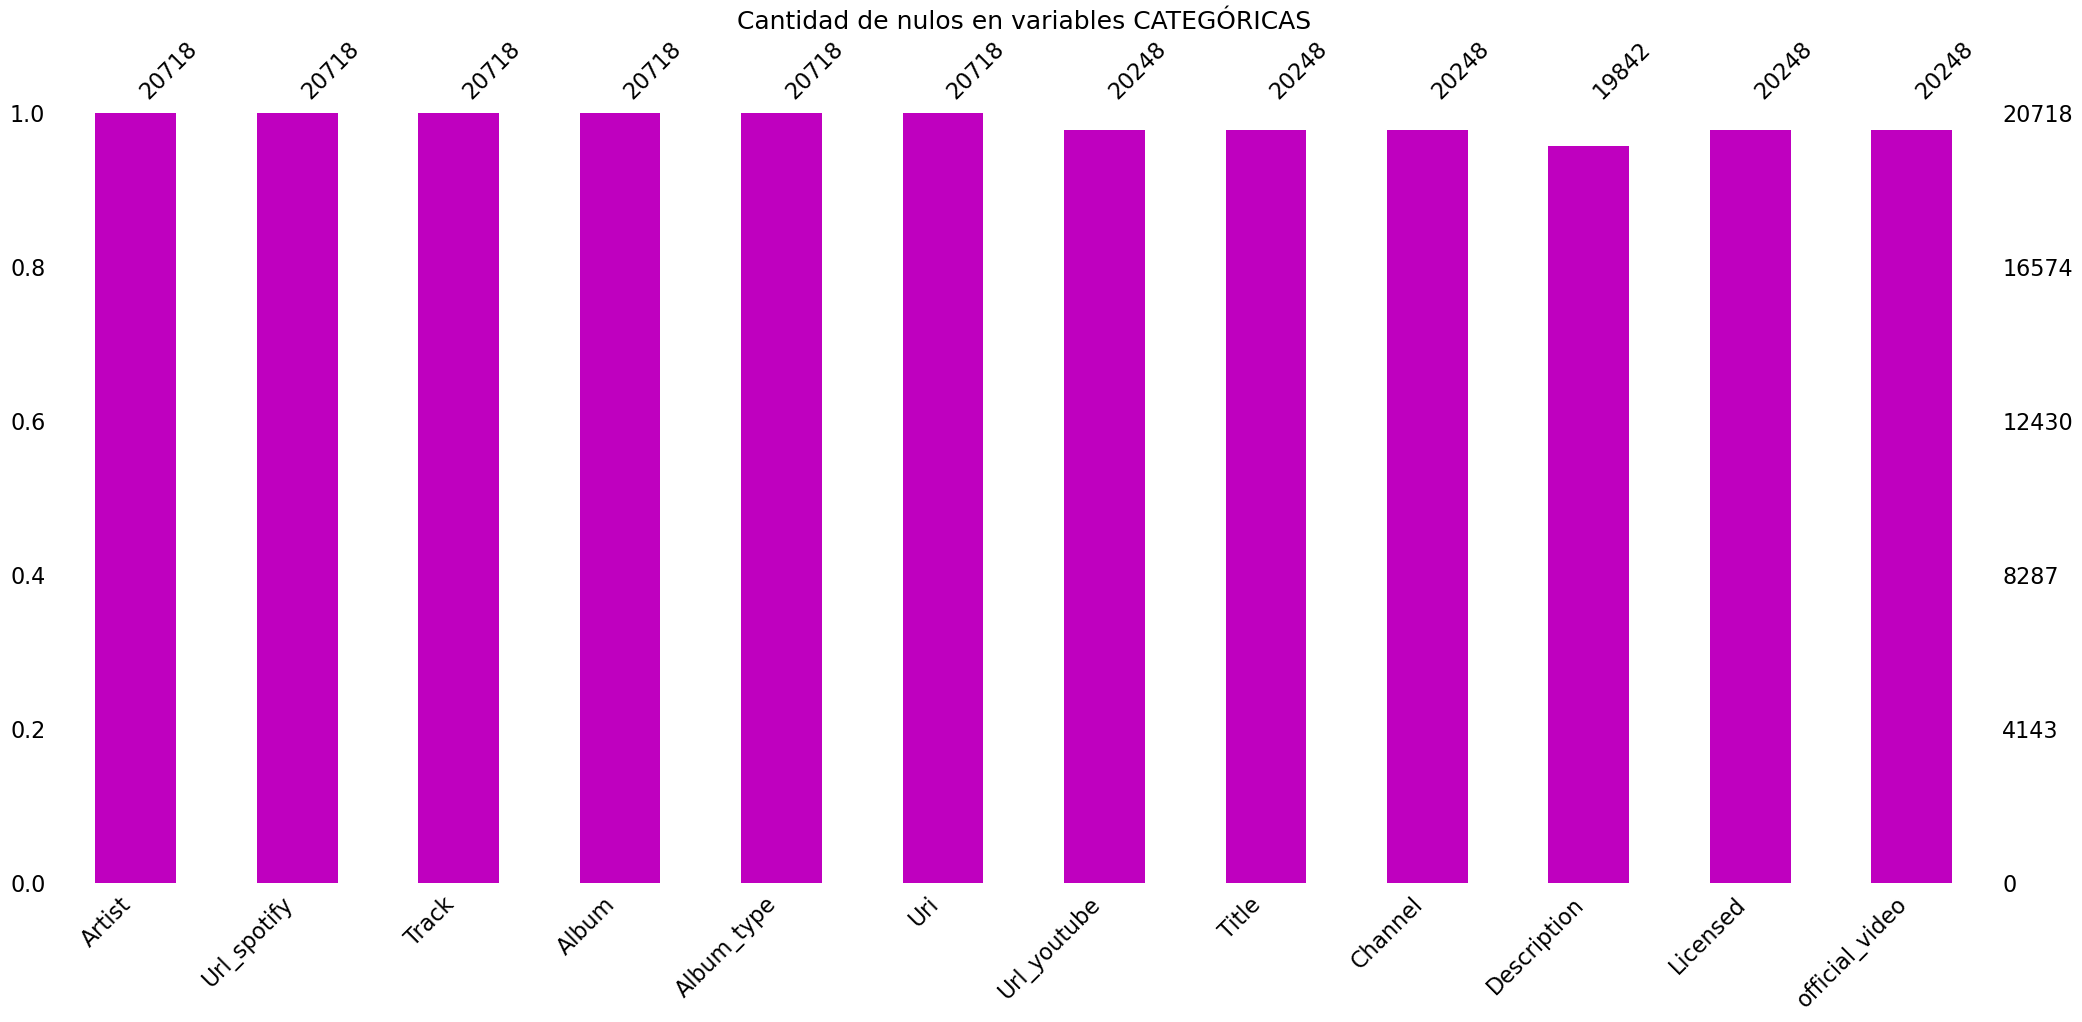

In [30]:
msno.bar (categoricas, color='m')
plt.title ('Cantidad de nulos en variables CATEGÓRICAS', fontsize=18)
plt.show()

### Tratamiento de Datos Nulos


- Los datos nulos en las variables normales los reemplazo con la media
- Los datos nulos en las variables no normales los reemplazo con la mediana
- Los datos nulos en las variables categoricas los reemplazo con la moda

In [28]:
# VARIABLES CATEGORICAS
from sklearn.impute import SimpleImputer#libreria ML


valores = categoricas.copy() # se crea una copia para no modificar el df categoricas

imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # se define el imputador

transformados = imputador.fit_transform(valores) # transformación del dataset

missing_count = pd.DataFrame(transformados).isnull().sum() # se cuenta el numero de NaN en cada columna

print ('El numero de nulos en cada columna es:')
print (missing_count)


transformados=pd.DataFrame(transformados) # se transforma el array en dataframe
transformados = transformados.rename (columns={0: 'Artist', 1: 'Url_spotify', 2: 'Track', 3: 'Album', 4: 'Album_type', 5: 'Uri', 6: 'Url_youtube', 7: 'Title', 8: 'Channel', 9: 'Description', 10: 'Licensed', 11: 'official_video'})

categoricas = transformados.copy()


El numero de nulos en cada columna es:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64


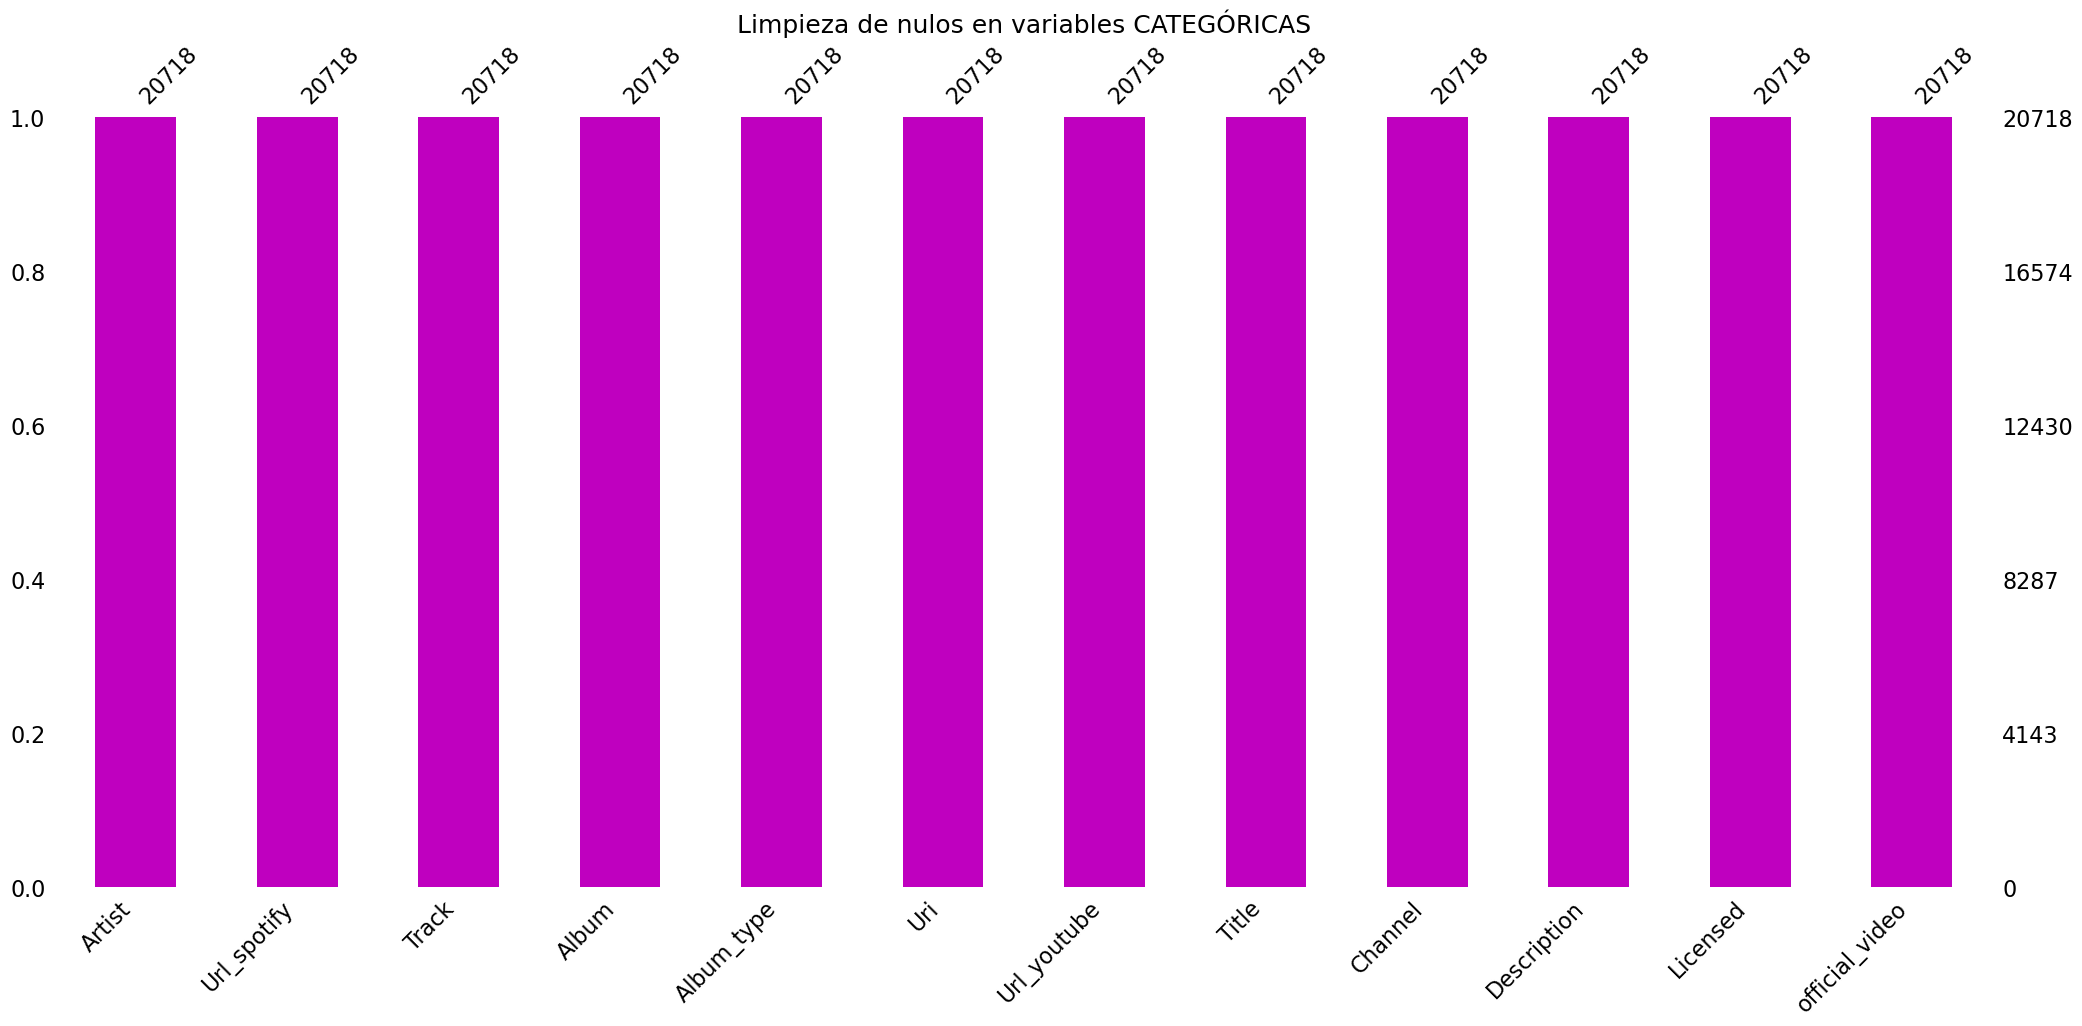

In [29]:
msno.bar (categoricas, color='m') #podemos observar que ya limpiamos los nulos
plt.title ('Limpieza de nulos en variables CATEGÓRICAS', fontsize=18)
plt.show()

In [30]:
valores = variables_normales.copy()

imputador = SimpleImputer(missing_values=np.nan, strategy='mean') #las variables normales se reemplazan con la media

transformados = imputador.fit_transform(valores) # transformacion del dataset


missing_count = pd.DataFrame(transformados).isnull().sum() # Cuenta  del numero de NaN en cada columna

print ('El numerco de nulos en cada columna es:')
print (missing_count)


transformados=pd.DataFrame(transformados) 
transformados = transformados.rename (columns={0: 'Danceability', 1: 'Energy', 2: 'Valence', 3: 'Tempo'})

variables_normales = transformados.copy()

El numerco de nulos en cada columna es:
0    0
1    0
2    0
3    0
dtype: int64


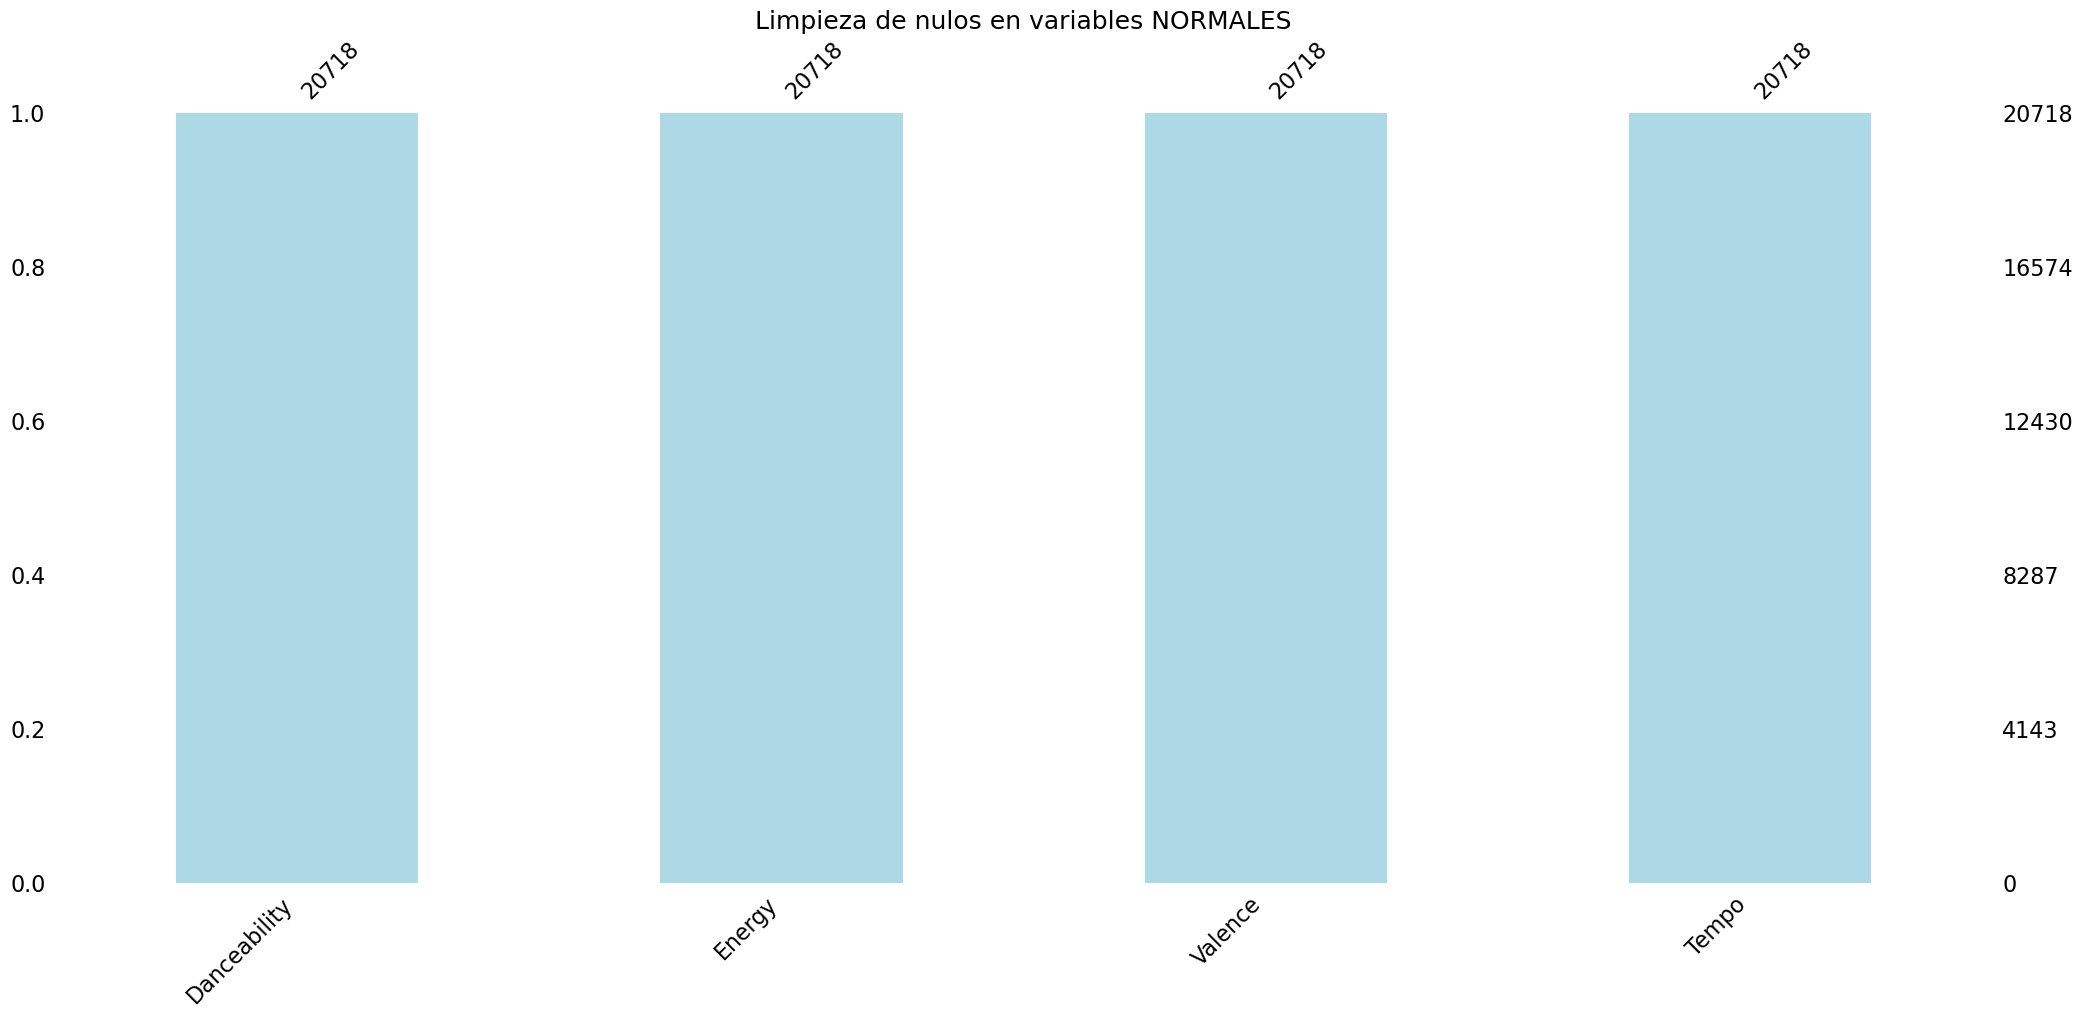

In [31]:
msno.bar (variables_normales, color='lightblue')
plt.title ('Limpieza de nulos en variables NORMALES', fontsize=18)
plt.show()

In [32]:
valores = variables_NOnormales.copy()

imputador = SimpleImputer(missing_values=np.nan, strategy='median') #las variables no normales se reemplazan con la mediana

transformados = imputador.fit_transform(valores) # transformacion del dataset


missing_count = pd.DataFrame(transformados).isnull().sum() # Cuenta del numero de NaN en cada columna

print ('El numerco de nulos en cada columna es:')
print (missing_count)


transformados=pd.DataFrame(transformados) 
transformados = transformados.rename (columns={0: 'Key', 1: 'Loudness', 2: 'Speechiness', 3: 'Acousticness', 4: 'Instrumentalness',
       5: 'Liveness', 6: 'Duration_ms', 7: 'Views',8:  'Likes',9:  'Comments', 10: 'Stream'})

variables_NOnormales = transformados.copy()

El numerco de nulos en cada columna es:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


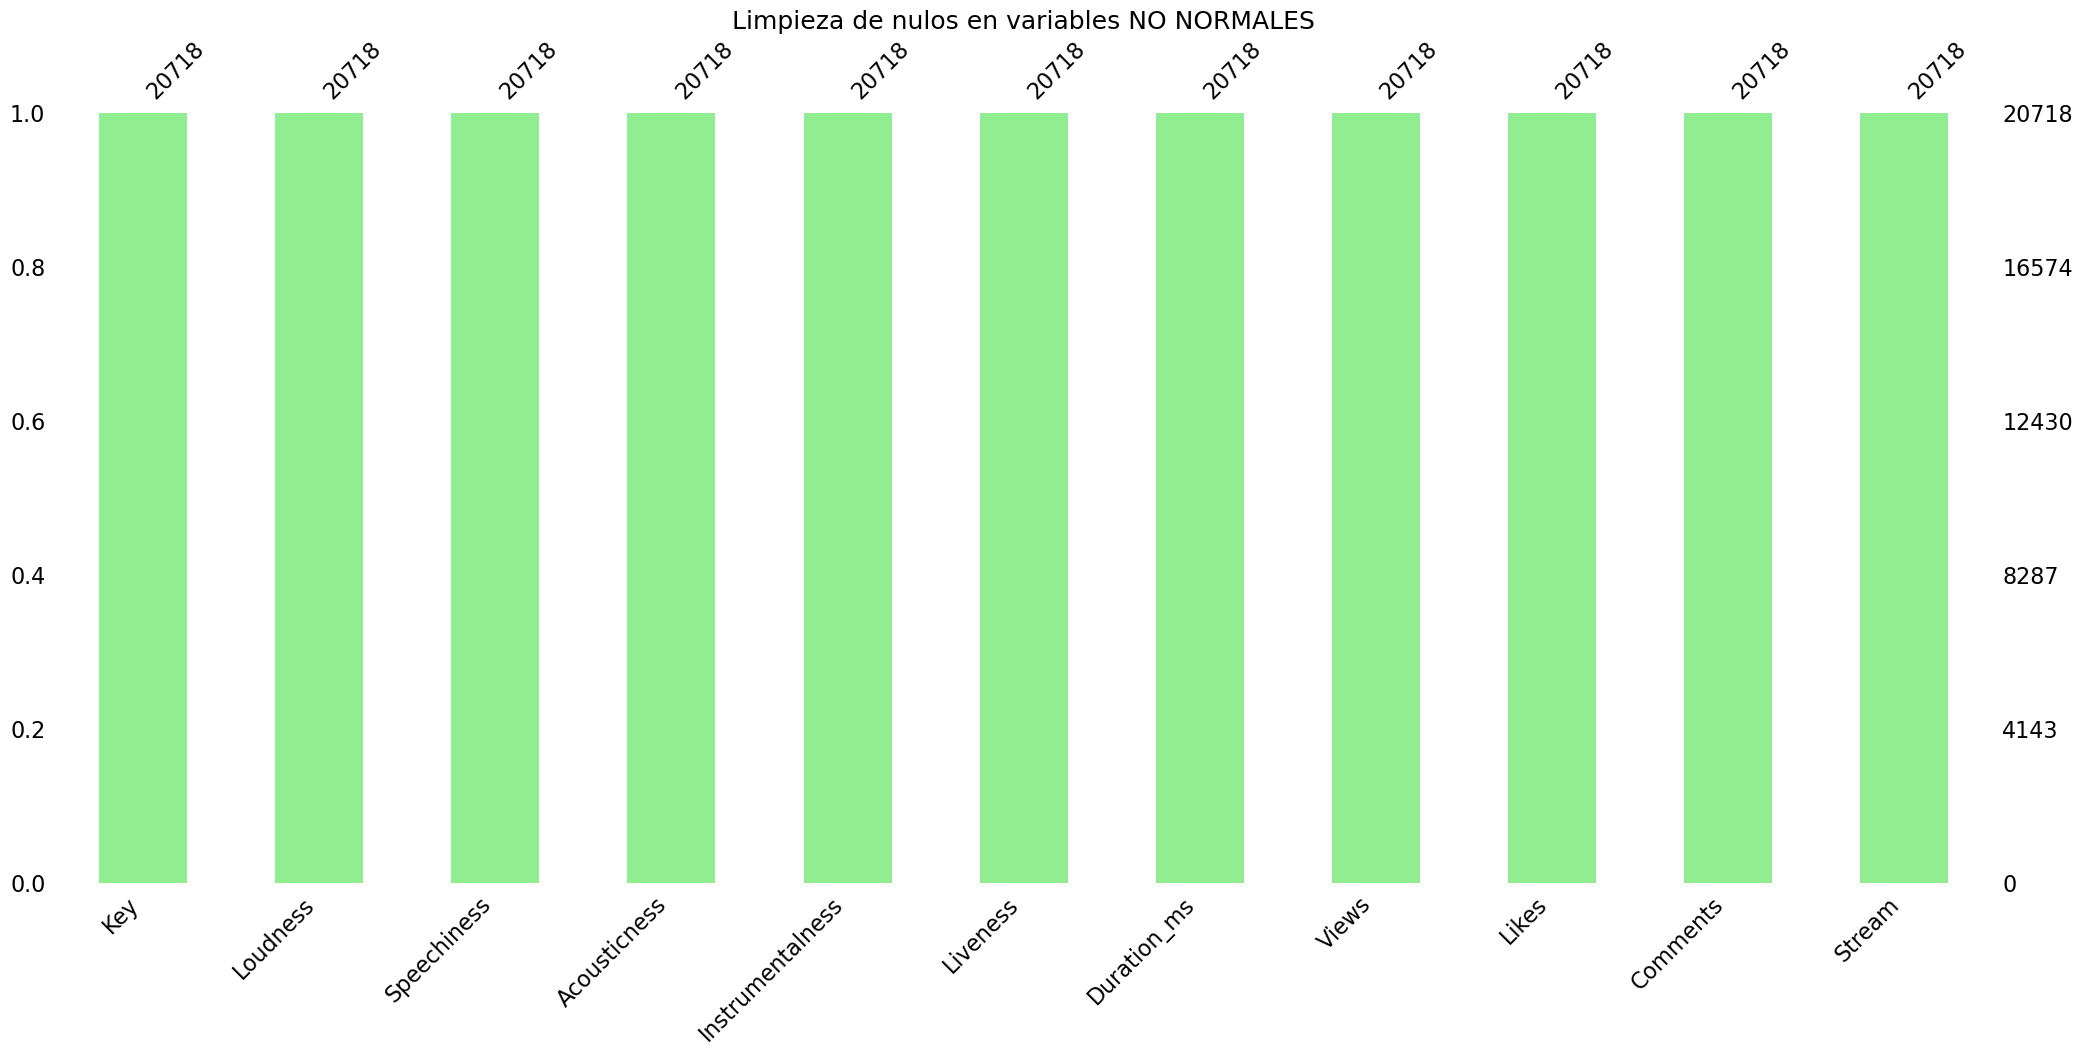

In [33]:
msno.bar (variables_NOnormales, color='lightgreen')
plt.title ('Limpieza de nulos en variables NO NORMALES', fontsize=18)
plt.show()

# Visualización, identificación y tratamiento de outliers

### VARIABLES NORMALES - Z-SCORE

In [34]:
datos = variables_normales.copy()
datos_z = pd.DataFrame() #df convertido a z score
for j in datos.columns[0:]:
  datos_z[j] = (datos[j] - datos[j].mean()) / datos[j].std()
datos_z.head()
# se dejan los datos en base a la desviacion estandar

,Danceability,Energy,Valence,Tempo
0,1.199427,0.325725,0.986626,0.605886
1,0.340198,0.316385,1.312586,-0.942516
2,0.455165,1.343767,0.086162,-0.426821
3,0.418859,0.484502,0.196174,-0.007281
4,0.261536,0.274356,-0.019775,1.599679


Se trabaja en una copia para no perder datos, luego se asigna a la variable correspondiente

- REEMPLAZO DE OUTLIERS POR LA MEDIA

In [35]:
datos['Danceability'] = datos_z['Danceability'].apply(lambda x: datos['Danceability'].mean() if (x>2 or x<-2) else x)
datos['Energy']= datos_z['Energy'].apply(lambda x: datos['Energy'].mean() if (x>2 or x<-2) else x)
datos['Valence']= datos_z['Valence'].apply(lambda x: datos['Valence'].mean() if (x>2 or x<-2) else x)
datos['Tempo']= datos_z['Tempo'].apply(lambda x: datos['Tempo'].mean() if (x>2 or x<-2) else x)


datos_z.head()

,Danceability,Energy,Valence,Tempo
0,1.199427,0.325725,0.986626,0.605886
1,0.340198,0.316385,1.312586,-0.942516
2,0.455165,1.343767,0.086162,-0.426821
3,0.418859,0.484502,0.196174,-0.007281
4,0.261536,0.274356,-0.019775,1.599679


### Visualización de limpieza de outliers en variables NORMALES

VISUALIZACIÓN DE LA VARIABLE CON OUTLIERS

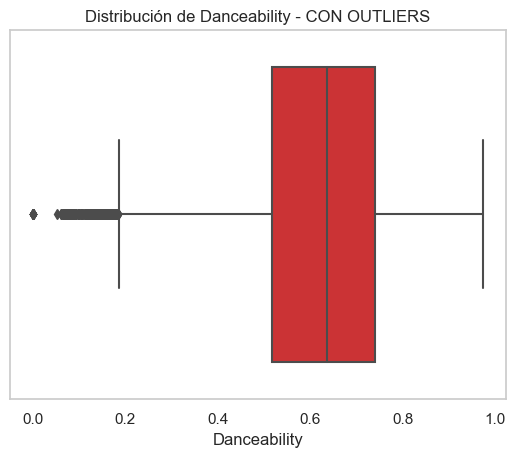

In [36]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=variables_normales['Danceability'], palette='Set1')
ax.grid(False)
ax.set_title('Distribución de Danceability - CON OUTLIERS')
plt.show()

ASIGNACIÓN DE DATOS SIN OUTLIERS A LA VARIABLE CORRESPONDIENTE

In [37]:
variables_normales = datos.copy()

VISUALIZACIÓN DE LA VARIABLE SIN OUTLIERS

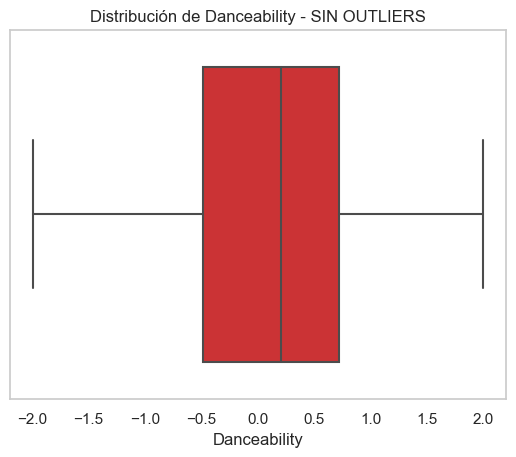

In [38]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=variables_normales['Danceability'], palette='Set1')
ax.grid(False)
ax.set_title('Distribución de Danceability - SIN OUTLIERS')
plt.show()

Las variables NORMALES ya no tienen outliers

### VARIABLES NO NORMALES - IQR

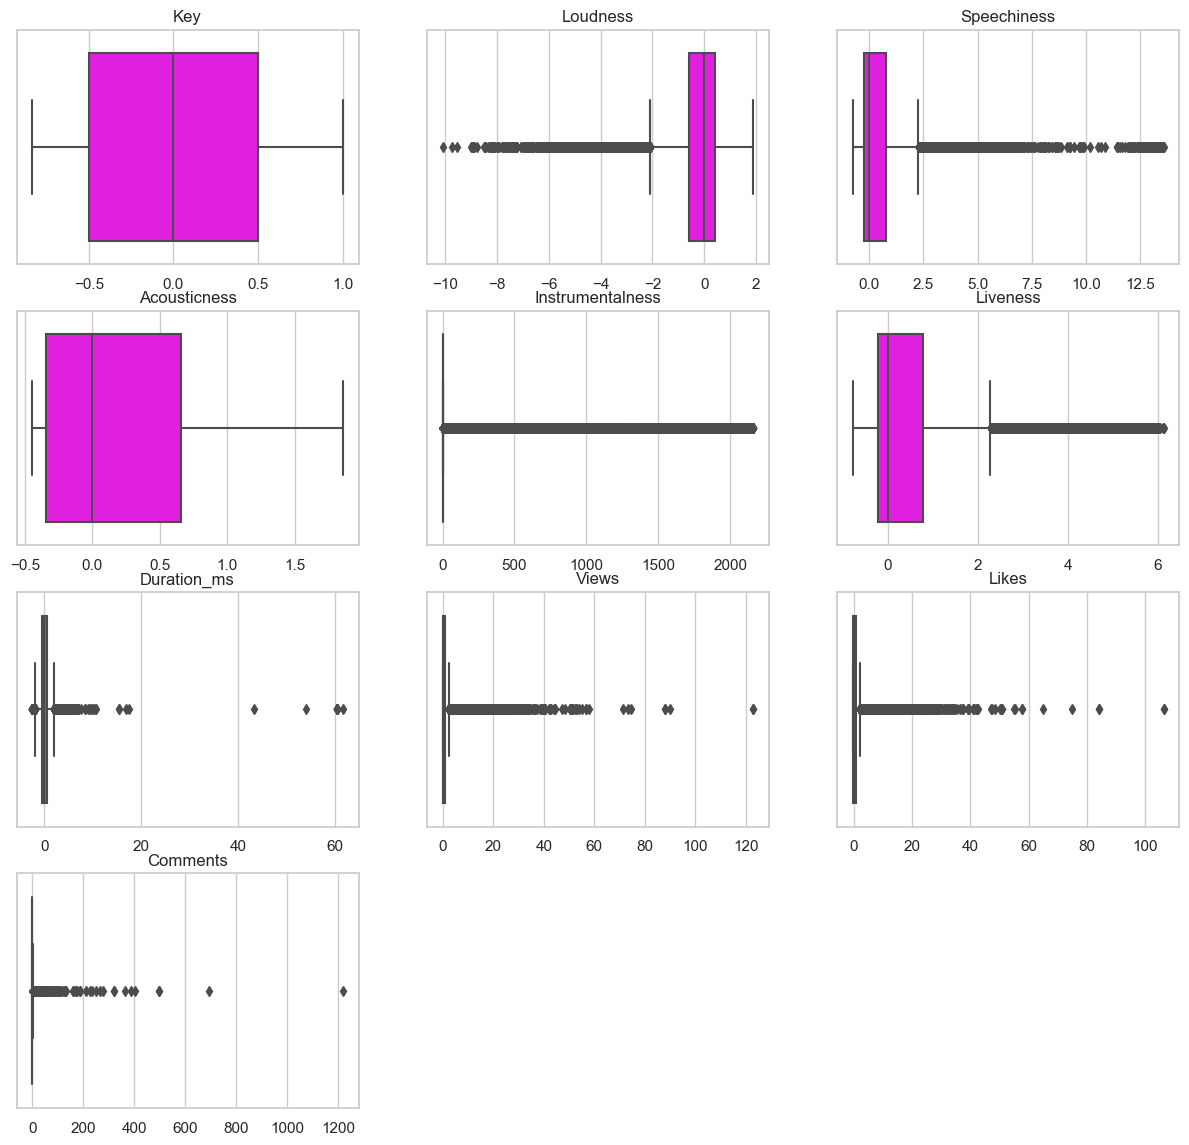

In [92]:
plt.figure(figsize=(15,14), dpi=100)
for i,j in zip(range(10),variables_NOnormales.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(x=variables_NOnormales[j], color='magenta')
  plt.title(j)
  plt.xlabel('')

ACLARACIÓN: En un principio la idea era reemplazar los outliers, pero al hacer los gráficos de las distribuciones se puede ver que en algunas variables hay demasiados datos atípicos. Esto me lleva a pensar en la causa de estos datos y de la importancia de analizarlos como están. Por eso se toma la decisión de continuar con el modelo sin reemplazar los outliers de las variables que no son normales. 
En el caso de la variable que quiero predecir (LIKES) se ven muchísimos y considero que si se eliminan no se va a llegar a un buen modelo predictivo.

# Preprocesamiento

### ENCODEO DE VARIABLES CATEGÓRICAS

In [39]:
datos3 = categoricas.copy()
datos3.tail()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True
20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for columna in datos3:
    label_encoder.fit(datos3[columna])
    datos3[columna] = label_encoder.transform(datos3[columna])

datos3.head()


,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
0,687,837,4982,2638,0,1481,5364,6144,1980,8575,1,1
1,687,837,12385,7760,0,4053,17748,6148,1980,14167,1,1
2,687,837,10330,6941,2,14757,15405,6145,1980,4895,1,1
3,687,837,10895,7760,0,1973,288,6147,1980,4379,1,1
4,687,837,2898,4140,0,18800,673,6140,1980,14016,1,1


In [41]:
categoricas = datos3.copy()
categoricas.tail()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
20713,1616,856,7413,5073,2,1049,1780,7157,4501,10594,1,1
20714,1616,856,12661,8505,2,9412,14909,13844,4501,10602,1,1
20715,1616,856,10776,7206,2,11518,1915,11995,4501,10598,1,1
20716,1616,856,10765,7195,2,12752,9206,11988,4501,10597,1,1
20717,1616,856,9051,6117,2,16405,18044,10148,4501,10596,1,1


### ESCALANDO LOS DATOS

VARIABLES NORMALES

In [43]:
normales = variables_normales.copy()
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()

for columna in normales :
    normales[columna] = scaler_standard.fit_transform(normales[[columna]])


variables_normales = normales.copy()


In [44]:
variables_normales.head()

,Danceability,Energy,Valence,Tempo
0,1.254939,0.214449,0.980202,-0.166388
1,0.260488,0.203293,1.313367,-0.234276
2,0.393548,1.430485,0.059835,-0.211666
3,0.351529,0.404106,0.172278,-0.193272
4,0.169446,0.153090,-0.048444,-0.122816


VARIABLES NO NORMALES

In [45]:
noNormales = variables_NOnormales.copy()
from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()

for columna in noNormales:
    noNormales[columna] = scaler_robust.fit_transform(noNormales[[columna]])



variables_NOnormales = noNormales.copy()


In [46]:
variables_NOnormales.head()

,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Duration_ms,Views,Likes,Comments,Stream
0,0.166667,-0.036417,1.879643,-0.427605,5.029919,3.415573,0.129162,10.360640,12.790424,12.635929,8.573645
1,0.500000,0.183612,-0.301634,-0.245716,1.479406,-0.550831,-0.181017,0.877465,2.002872,2.102525,2.253878
2,-0.666667,0.663653,0.025260,-0.348541,101.345424,-0.062992,0.025755,-0.092552,0.330777,0.312581,0.115814
3,-0.500000,0.184886,-0.364042,-0.446931,1099.940778,-0.426947,0.284162,3.009592,3.491313,3.939638,3.332169
4,0.833333,-0.532501,1.790490,-0.388374,-0.005197,-0.386352,1.762136,9.215198,12.740957,11.576022,4.912616


### Preparando el dataset para entrenar

In [47]:
categoricas.reset_index(drop=True, inplace=True)
variables_normales.reset_index(drop=True, inplace=True)
variables_NOnormales.reset_index(drop=True, inplace=True)

In [48]:
df_limpio = pd.concat ([categoricas, variables_normales, variables_NOnormales], axis=1)
df_limpio.reset_index(drop=True, inplace=True)
df_limpio.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,...,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Duration_ms,Views,Likes,Comments,Stream
0,687,837,4982,2638,0,1481,5364,6144,1980,8575,...,-0.036417,1.879643,-0.427605,5.029919,3.415573,0.129162,10.360640,12.790424,12.635929,8.573645
1,687,837,12385,7760,0,4053,17748,6148,1980,14167,...,0.183612,-0.301634,-0.245716,1.479406,-0.550831,-0.181017,0.877465,2.002872,2.102525,2.253878
2,687,837,10330,6941,2,14757,15405,6145,1980,4895,...,0.663653,0.025260,-0.348541,101.345424,-0.062992,0.025755,-0.092552,0.330777,0.312581,0.115814
3,687,837,10895,7760,0,1973,288,6147,1980,4379,...,0.184886,-0.364042,-0.446931,1099.940778,-0.426947,0.284162,3.009592,3.491313,3.939638,3.332169
4,687,837,2898,4140,0,18800,673,6140,1980,14016,...,-0.532501,1.790490,-0.388374,-0.005197,-0.386352,1.762136,9.215198,12.740957,11.576022,4.912616


Se concatena el dataset de variables categoricas con las numéricas normales y no normales, para tener una base de datos completa como al principio pero limpia de nulos, outliers, encodeada y escalada.

### Variable DEPENDIENTE vs INDEPENDIENTE

In [49]:
X_df = df_limpio.drop('Likes', axis=1)
Y_df = df_limpio ['Likes']


La variable que quiero predecir es LIKES

### Mapa de correlaciones

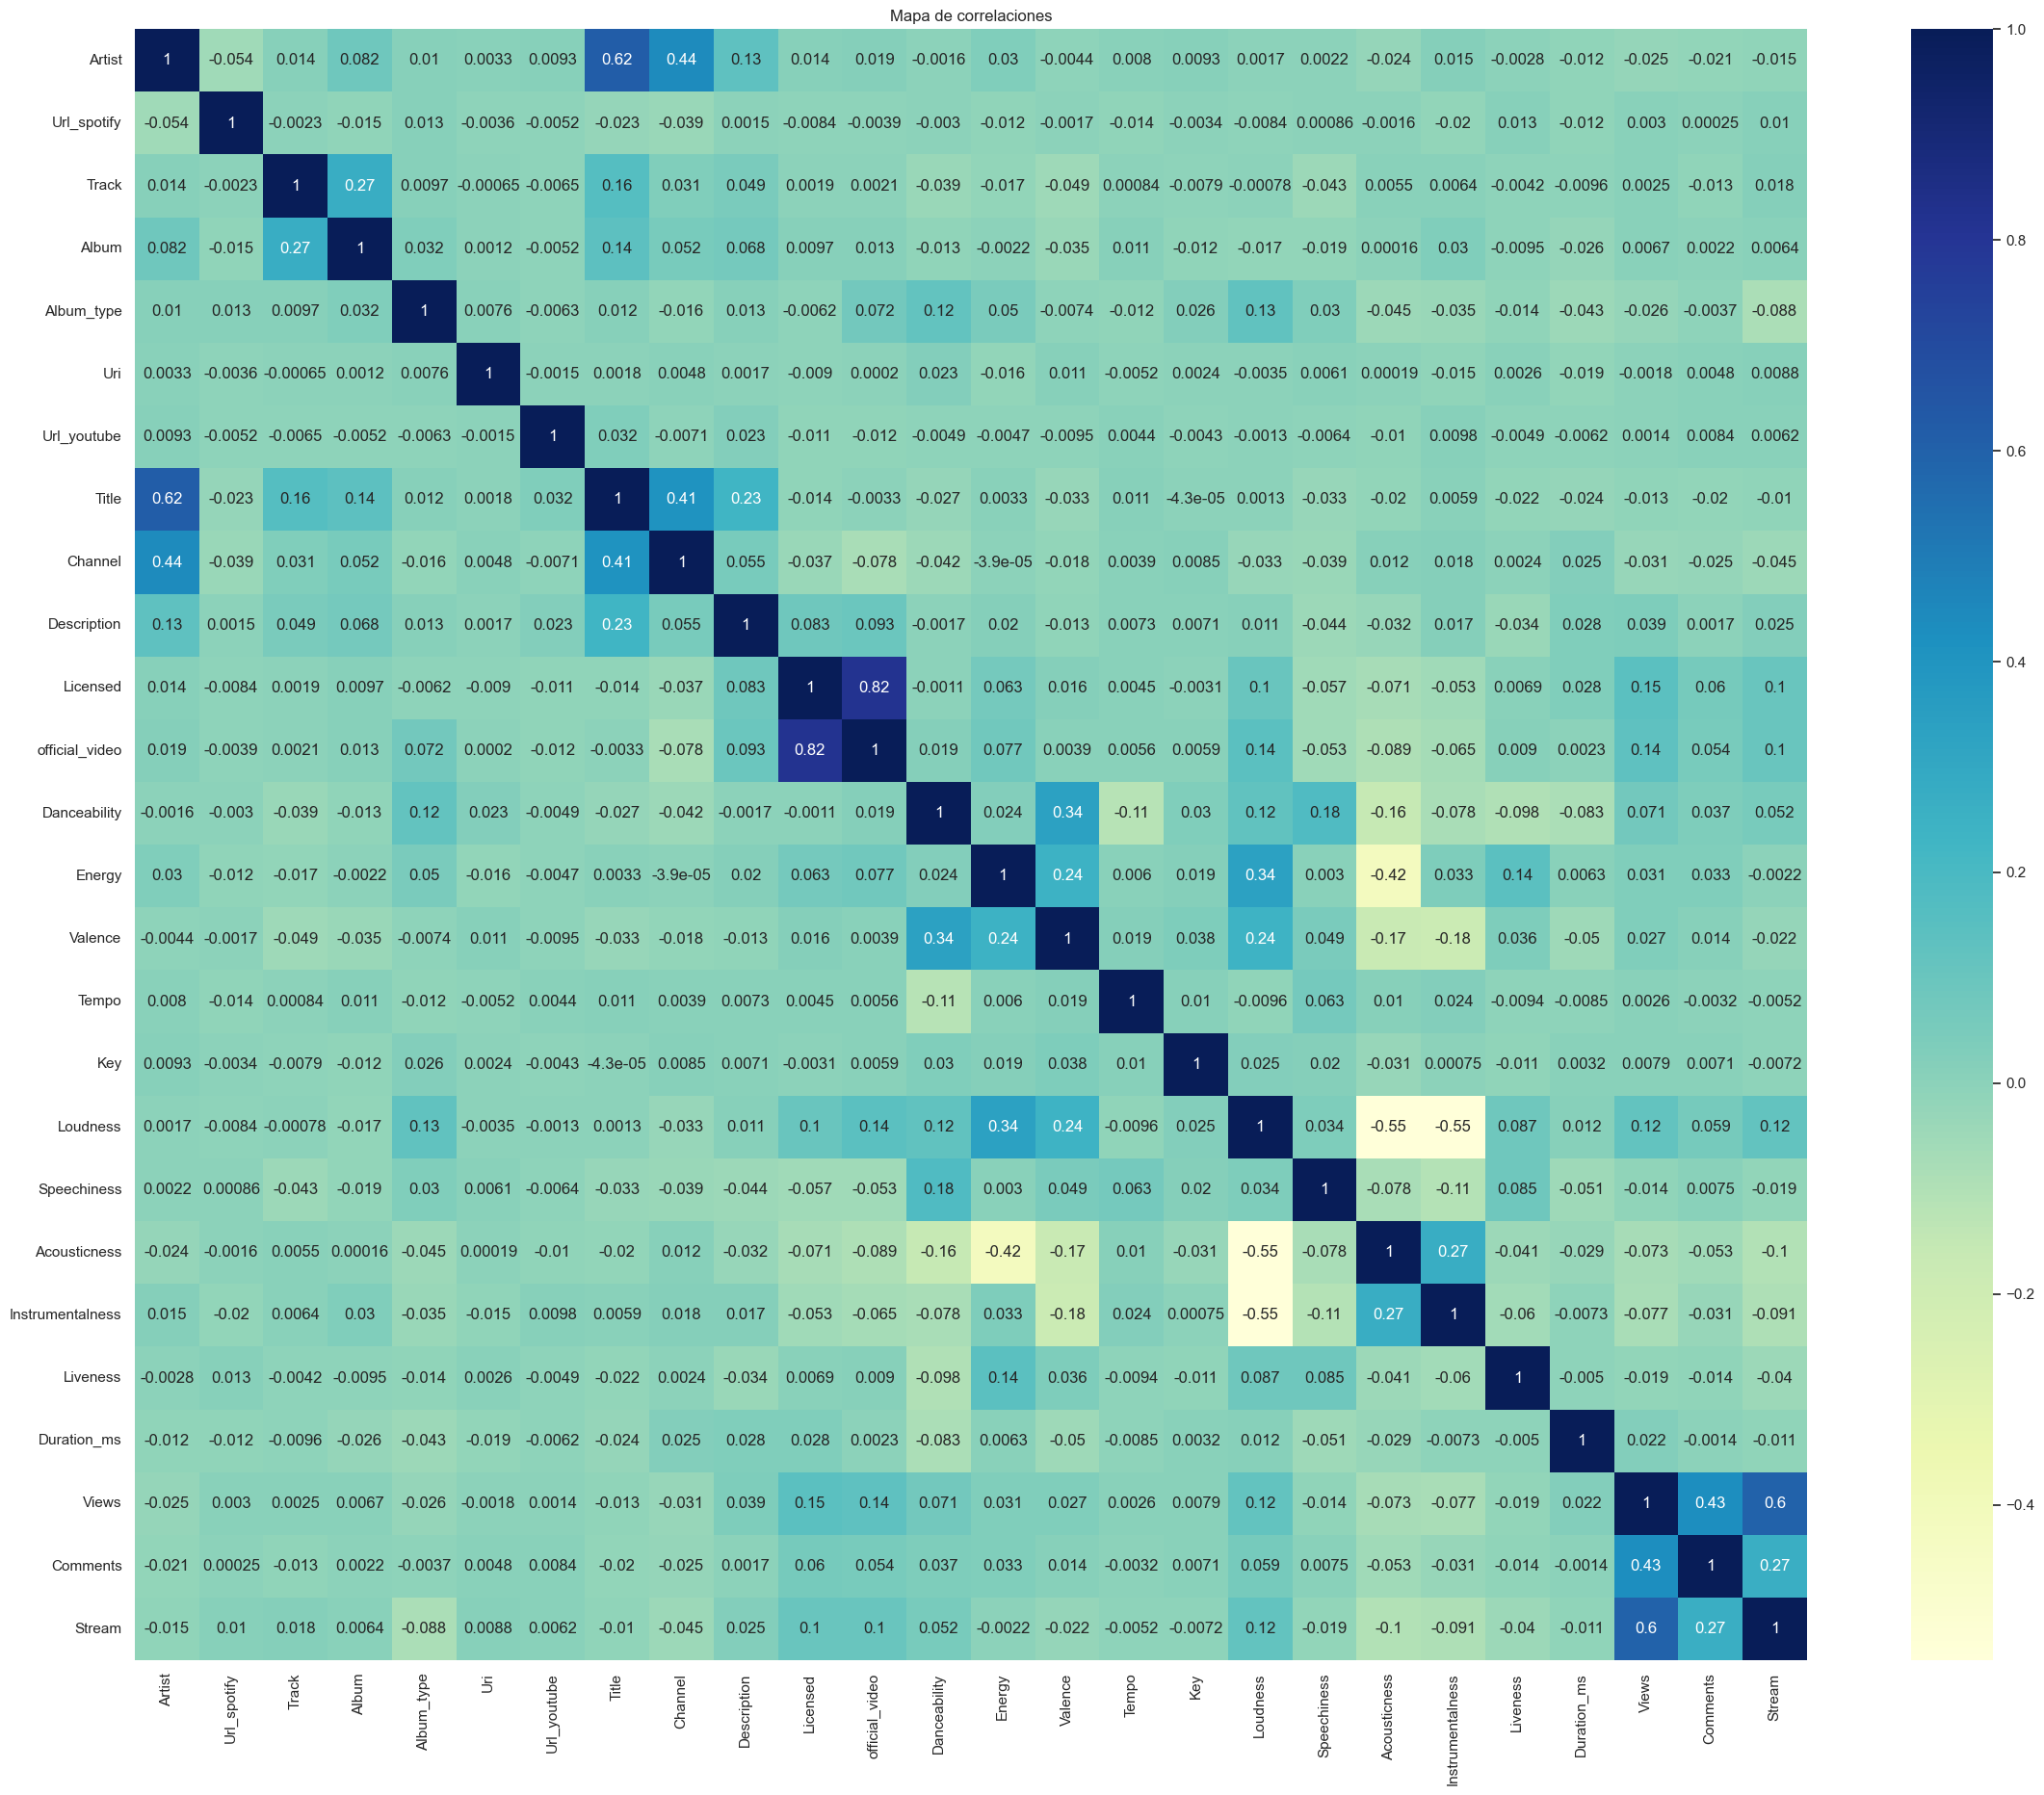

In [51]:
mapa = X_df.corr()
plt.figure(figsize=(28, 22))
sns.heatmap(mapa,annot=True, cmap="YlGnBu")
plt.title( 'Mapa de correlaciones')
plt.show()


Se observa que hay una correlacion entre algunas variables
- ARTIST - TITLE (0.62)
- LICENSED - OFFICIAL VIDEO (0.82)
- VIEWS - STREAM (0.6)

Se debe eliminar alguna de estas variables porque no se puede hacer la regresión si hay algunas variables que dependen de otras

In [52]:
columnas_a_eliminar = ['Artist','Licensed', 'Stream']
X_df.drop(columnas_a_eliminar, axis=1, inplace=True)

### Variables de ENTRENAMIENTO vs Variables de PRUEBA

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

# Feature Selection 

In [60]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4, #cantidad de variables que se requieren
          forward=True,
          floating=False,
          scoring = 'r2', 
          cv = 5)


In [65]:
sfs.fit(X_train, y_train)
sfs.k_feature_names_     #Lista final de features
#Estas son las variables mas importantes a la hora de hacer la prediccion de visualizaciones.



('Album_type', 'Valence', 'Views', 'Comments')

In [66]:
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Entrenamiento Modelo de Regresión

In [67]:
lr = LinearRegression() #creo el modelo

lr.fit(X_train_selected, y_train) # entreno, ajusto el modelo con variables de ENTRENAMIENTO

y_pred = lr.predict(X_test_selected) #predicción sobre la variable de PRUEBA


# Métricas de Regresión

### R2 - R Cuadrado

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8753760707358906


Que la metrica r2 me de 0.87 significa que el modelo esta tomando el 87% de la variabilidad de los datos. Ajuste muy bueno de los datos (esta siendo representativo de la forma de mis datos)

### MAE - Error Absoluto Medio

In [69]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.5113146282552375


In [70]:
likes_range = Y_df.describe()[['min', 'max']]
print("Rango de la variable 'Likes':")
likes_range

Rango de la variable 'Likes':


min     -0.261164
max    106.294640
Name: Likes, dtype: float64

Ante un rango de valores que va desde -0.2 hasta 106.29, un ERROR ABSOLUTO MEDIO de 0.51 podría considerarse bajo con comparación con el rango total de la variable

### MSE - Error Cuadrático Medio

In [71]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1.6699758163238794


In [72]:
print (Y_df.describe())

count    20718.000000
mean         1.101020
std          3.709089
min         -0.261164
25%         -0.212864
50%          0.000000
75%          0.787136
max        106.294640
Name: Likes, dtype: float64


Un ERROR CUADRÁTICO MEDIO de 1.66 podria considerarse aceptable para este modelo. No es altamente preciso, pero tampoco es malo

### RMSE - Raíz del Error Cuadrático Medio

In [73]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.292275441352918


Un RMSE de aproximadamente 1.292 para la variable likes indica que las predicciones del modelo tienen de desviarse en promedio alrededor de 1.292 unidades de la verdadera cantidad de likes. Esto indica que la dispersión de los errores es relativamente baja en comparación con el rango de la variable de respuesta

# VALIDACIÓN CRUZADA

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_df, Y_df, cv=5, scoring='neg_mean_squared_error')

print("Mean Squared Error (MSE) scores:", -scores)
print("Mean MSE:", -scores.mean())

Mean Squared Error (MSE) scores: [1.22359085 0.41760354 0.9959408  4.68252998 3.94640655]
Mean MSE: 2.253214343537007


Dado que el MSE promedio durante la validación cruzada es mayor que el MSE después del entrenamiento en todo el conjunto de datos, se podría sugerir que el modelo está sobreajustando los datos de entrenamiento (overfitting). Esto significa que el modelo está capturando demasiado bien los detalles específicos del conjunto de entrenamiento pero no generaliza bien a nuevos datos.